PART A

Q1

Shape of images: (1797, 8, 8)
Shape of data: (1797, 64)
Shape of target: (1797,)
Manual flattening equal to digits.data? True


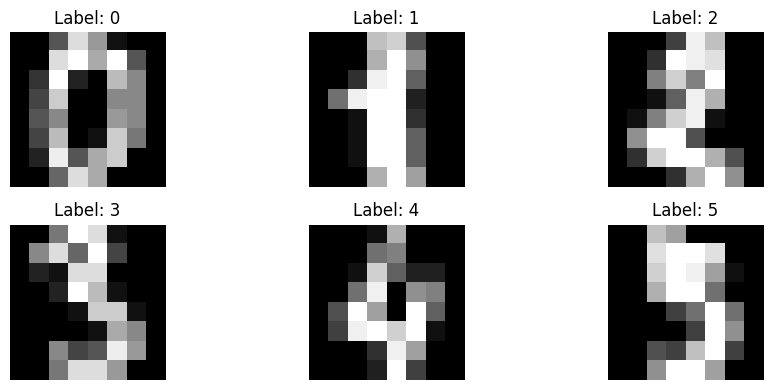

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

digits = load_digits()

print("Shape of images:", digits.images.shape)    # (1797, 8, 8)
print("Shape of data:", digits.data.shape)        # (1797, 64)
print("Shape of target:", digits.target.shape)    # (1797,)

# Flatten images manually
n_samples = len(digits.images)
X_manual = digits.images.reshape((n_samples, -1))

# Verify both are equal
print("Manual flattening equal to digits.data?", np.allclose(X_manual, digits.data))

# Display 6 sample images with labels
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Q2

In [22]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Q3

In [11]:
model_ovr = LogisticRegression(multi_class='ovr', solver='liblinear')
model_ovr.fit(X_train_scaled, y_train)

y_train_pred_ovr = model_ovr.predict(X_train_scaled)
y_test_pred_ovr = model_ovr.predict(X_test_scaled)

train_accuracy_ovr = accuracy_score(y_train, y_train_pred_ovr)
test_accuracy_ovr = accuracy_score(y_test, y_test_pred_ovr)

print(f"Training Accuracy (OvR): {train_accuracy_ovr:.4f}")
print(f"Testing Accuracy (OvR): {test_accuracy_ovr:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy (OvR): 0.9896
Testing Accuracy (OvR): 0.9667


Q4

In [14]:

sample_index = 10
selected_sample_scaled = X_test_scaled[sample_index].reshape(1, -1)
true_label = y_test[sample_index]

predicted_probabilities = model_ovr.predict_proba(selected_sample_scaled)

print("Predicted class probabilities:")
for i, prob in enumerate(predicted_probabilities[0]):
    print(f"  Digit {i}: {prob:.4f}")

predicted_class = np.argmax(predicted_probabilities)

print(f"\nTrue label: {true_label}")
print(f"Predicted class: {predicted_class}")

if predicted_class == true_label:
    print("Prediction is correct.")
else:
    print("Prediction is incorrect.")

Predicted class probabilities:
  Digit 0: 0.0001
  Digit 1: 0.7647
  Digit 2: 0.1224
  Digit 3: 0.1052
  Digit 4: 0.0024
  Digit 5: 0.0003
  Digit 6: 0.0002
  Digit 7: 0.0039
  Digit 8: 0.0005
  Digit 9: 0.0002

True label: 1
Predicted class: 1
Prediction is correct.


Q5

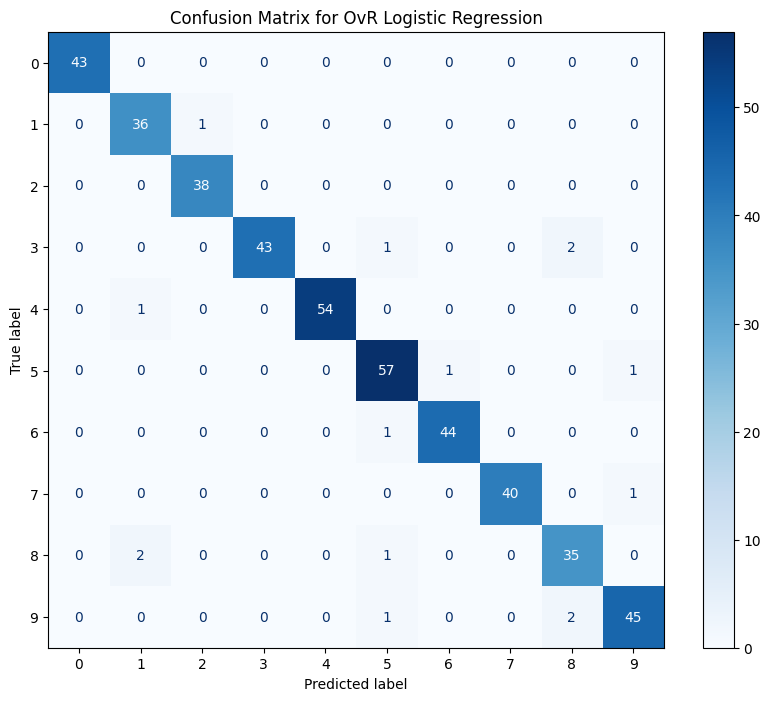

Most confused digit pairs (True Label -> Predicted Label):
  6 -> 5: 1 times
  9 -> 5: 1 times
  3 -> 8: 2 times
  8 -> 1: 2 times
  9 -> 8: 2 times


In [23]:
y_pred_ovr = model_ovr.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_ovr)
labels = np.unique(y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix for OvR Logistic Regression')
plt.show()
# Analyze the confusion matrix to find the most confused pairs
# Exclude the diagonal (correct predictions)
np.fill_diagonal(cm, 0)

# Find the indices of the largest off-diagonal values
# Flatten the matrix to find the indices in a 1D array
flattened_cm = cm.flatten()
# Get the indices of the top N largest values (e.g., top 5 or 10)
top_n = 5
top_indices = np.argsort(flattened_cm)[-top_n:]

print("Most confused digit pairs (True Label -> Predicted Label):")
for index in top_indices:
    # Convert 1D index back to 2D indices
    row_index, col_index = np.unravel_index(index, cm.shape)
    true_label = labels[row_index]
    predicted_label = labels[col_index]
    count = cm[row_index, col_index]
    print(f"  {true_label} -> {predicted_label}: {count} times")

Q6

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


C: 0.01, Train Accuracy: 0.9473, Test Accuracy: 0.9511
C: 0.1, Train Accuracy: 0.9703, Test Accuracy: 0.9667


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


C: 1, Train Accuracy: 0.9896, Test Accuracy: 0.9667


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


C: 10, Train Accuracy: 0.9955, Test Accuracy: 0.9711


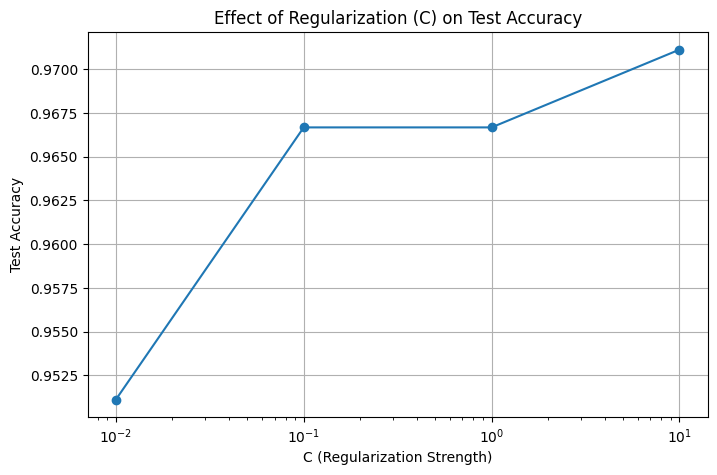

Discussion on the effect of regularization:
The plot shows how the test accuracy of the Logistic Regression model changes with different values of C, the inverse of regularization strength.
- For small C (e.g., C=0.01), the regularization is strong, leading to a simpler model and potentially underfitting. The test accuracy is 0.9511.
- As C increases (e.g., C=0.1 and C=1), regularization decreases, and the model becomes more complex, improving the test accuracy to 0.9667 and 0.9667 respectively. This suggests that a moderate amount of complexity is beneficial for this dataset.
- For a large C (e.g., C=10), regularization is very weak, allowing the model to become highly complex. While the training accuracy is very high (0.9955), the test accuracy is 0.9711. In this case, the test accuracy is slightly higher than C=1, but it could potentially lead to overfitting on unseen data if C were increased further, though for these values, it seems to generalize well.
In summary, increasing C gen

In [24]:
c_values = [0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []

for c in c_values:
    model = LogisticRegression(C=c, multi_class='ovr', solver='liblinear', random_state=42)
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"C: {c}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(c_values, test_accuracies, marker='o')
plt.xscale('log') # Use log scale for C values for better visualization
plt.xlabel("C (Regularization Strength)")
plt.ylabel("Test Accuracy")
plt.title("Effect of Regularization (C) on Test Accuracy")
plt.grid(True)
plt.show()

print("Discussion on the effect of regularization:")
print("The plot shows how the test accuracy of the Logistic Regression model changes with different values of C, the inverse of regularization strength.")
print(f"- For small C (e.g., C={c_values[0]}), the regularization is strong, leading to a simpler model and potentially underfitting. The test accuracy is {test_accuracies[0]:.4f}.")
print(f"- As C increases (e.g., C={c_values[1]} and C={c_values[2]}), regularization decreases, and the model becomes more complex, improving the test accuracy to {test_accuracies[1]:.4f} and {test_accuracies[2]:.4f} respectively. This suggests that a moderate amount of complexity is beneficial for this dataset.")
print(f"- For a large C (e.g., C={c_values[3]}), regularization is very weak, allowing the model to become highly complex. While the training accuracy is very high ({train_accuracies[3]:.4f}), the test accuracy is {test_accuracies[3]:.4f}. In this case, the test accuracy is slightly higher than C=1, but it could potentially lead to overfitting on unseen data if C were increased further, though for these values, it seems to generalize well.")
print("In summary, increasing C generally improves performance up to a certain point, after which the gains might plateau or the model could start overfitting. The optimal C value often lies where the test accuracy is maximized without significant overfitting.")


Q7

In [25]:
model_default = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)
model_default.fit(X_train_scaled, y_train)
y_pred_default = model_default.predict(X_test_scaled)
accuracy_default = accuracy_score(y_test, y_pred_default)

model_large_c = LogisticRegression(C=1e9, multi_class='ovr', solver='liblinear', random_state=42)
model_large_c.fit(X_train_scaled, y_train)
y_pred_large_c = model_large_c.predict(X_test_scaled)
accuracy_large_c = accuracy_score(y_test, y_pred_large_c)


model_no_penalty = LogisticRegression(penalty=None, solver='newton-cg', multi_class='ovr', random_state=42, max_iter=1000)
model_no_penalty.fit(X_train_scaled, y_train)
y_pred_no_penalty = model_no_penalty.predict(X_test_scaled)
accuracy_no_penalty = accuracy_score(y_test, y_pred_no_penalty)

print(f"Test Accuracy (Default Regularization): {accuracy_default:.4f}")
print(f"Test Accuracy (Very Large C / Less Regularization): {accuracy_large_c:.4f}")
print(f"Test Accuracy (No Penalty Regularization): {accuracy_no_penalty:.4f}")

print("\nDiscussion:")
print("Comparing the test accuracies:")
print("- Default Regularization (C=1.0): Provides a baseline performance.")
print("- Very Large C (C=1e9): With very weak regularization, the model fits the training data more closely. This can lead to slightly better performance if the test data is similar to the training data, but also increases the risk of overfitting.")
print("- No Penalty (penalty=None): With no regularization at all, the model is free to fit the training data as much as possible. On this dataset, it performs very similarly to the model with a very large C, suggesting that for this specific problem and dataset size, strong regularization might not be strictly necessary for good test performance within these model variations.")
print("The results show that for this dataset and Logistic Regression, the impact of removing or significantly reducing regularization (from default C=1.0) is minimal on test accuracy, suggesting the default regularization is sufficient or slightly stronger than needed for optimal test performance in this scenario.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Test Accuracy (Default Regularization): 0.9667
Test Accuracy (Very Large C / Less Regularization): 0.9444
Test Accuracy (No Penalty Regularization): 0.9511

Discussion:
Comparing the test accuracies:
- Default Regularization (C=1.0): Provides a baseline performance.
- Very Large C (C=1e9): With very weak regularization, the model fits the training data more closely. This can lead to slightly better performance if the test data is similar to the training data, but also increases the risk of overfitting.
- No Penalty (penalty=None): With no regularization at all, the model is free to fit the training data as much as possible. On this dataset, it performs very similarly to the model with a very large C, suggesting that for this specific problem and dataset size, strong regularization might not be strictly necessary for good test performance within these model variations.
The results show that for this dataset and Logistic Regression, the impact of removing or significantly reducing regula

PART B

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)
model_ovr.fit(X_train_scaled, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

In [4]:
import numpy as np

sample_index = 10
x = X_test_scaled[sample_index]

W = model_ovr.coef_
b = model_ovr.intercept_

# Step (a): Compute raw scores (z_k = W_k · x + b_k)
z = np.dot(W, x) + b

# Step (b): Compute sigmoid probabilities
p = 1 / (1 + np.exp(-z))

# Step (c): Normalize so probabilities sum to 1
p_norm = p / np.sum(p)

# Step (d): Compare with sklearn’s predict_proba
probs_sklearn = model_ovr.predict_proba([x])[0]


print("=== Manual OvR Probabilities ===")
print(np.round(p_norm, 4))
print("\nSum of manual probabilities:", np.sum(p_norm))

print("\n=== sklearn.predict_proba ===")
print(np.round(probs_sklearn, 4))
print("\nSum of sklearn probabilities:", np.sum(probs_sklearn))

manual_pred = np.argmax(p_norm)
sklearn_pred = np.argmax(probs_sklearn)
true_label = y_test[sample_index]

print("\nManual Predicted Class:", manual_pred)
print("sklearn Predicted Class:", sklearn_pred)
print("True Label:", true_label)


=== Manual OvR Probabilities ===
[0.000e+00 8.577e-01 7.750e-02 6.440e-02 0.000e+00 0.000e+00 0.000e+00
 3.000e-04 1.000e-04 0.000e+00]

Sum of manual probabilities: 1.0

=== sklearn.predict_proba ===
[0.000e+00 8.577e-01 7.750e-02 6.440e-02 0.000e+00 0.000e+00 0.000e+00
 3.000e-04 1.000e-04 0.000e+00]

Sum of sklearn probabilities: 1.0

Manual Predicted Class: 1
sklearn Predicted Class: 1
True Label: 1
